## Analysis of the Breast Cancer Seer 2010-2016 Dataset

In [1]:
# Step 1: Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Load and read the dataset (SEER BC Incidence dataset -2010 to 2016)
# URL - https://seer.cancer.gov/data/ Data access requested and then data downloaded

seer18_bc = pd.read_csv(r"/Users/shilpakamath-jha/Desktop/SEERDATASET/ComprehensiveSEER18BCDataset2010to2016.csv", sep = ',')
seer18_bc.dtypes

Age recode with <1 year olds                            object
Age at diagnosis                                         int64
Age recode with single ages and 85+                     object
Race/ethnicity                                          object
Sex                                                     object
Year of diagnosis                                        int64
Race recode (White, Black, Other)                       object
State-county                                            object
Site recode ICD-O-3/WHO 2008                            object
Breast - Adjusted AJCC 6th Stage (1988-2015)            object
Breast - Adjusted AJCC 6th T (1988-2015)                object
Breast - Adjusted AJCC 6th N (1988-2015)                object
Breast - Adjusted AJCC 6th M (1988-2015)                object
Breast Subtype (2010+)                                  object
ER Status Recode Breast Cancer (1990+)                  object
PR Status Recode Breast Cancer (1990+)                 

In [3]:
##Step 3- Get info on the data to see how many null values are there
# There are 524 null values in four features:
# Breast - Adjusted AJCC 6th Stage (1988-2015)
# Breast - Adjusted AJCC 6th T (1988-2015)
# Breast - Adjusted AJCC 6th N (1988-2015)
# Breast - Adjusted AJCC 6th M (1988-2015)

seer18_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446806 entries, 0 to 446805
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype 
---  ------                                                --------------   ----- 
 0   Age recode with <1 year olds                          446806 non-null  object
 1   Age at diagnosis                                      446806 non-null  int64 
 2   Age recode with single ages and 85+                   446806 non-null  object
 3   Race/ethnicity                                        446806 non-null  object
 4   Sex                                                   446806 non-null  object
 5   Year of diagnosis                                     446806 non-null  int64 
 6   Race recode (White, Black, Other)                     446806 non-null  object
 7   State-county                                          446806 non-null  object
 8   Site recode ICD-O-3/WHO 2008                          

In [4]:
# Step 4 - View the first 5 rows of the dataset


seer18_bc.head()


,Age recode with <1 year olds,Age at diagnosis,Age recode with single ages and 85+,Race/ethnicity,Sex,Year of diagnosis,"Race recode (White, Black, Other)",State-county,Site recode ICD-O-3/WHO 2008,Breast - Adjusted AJCC 6th Stage (1988-2015),...,Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Grade,Diagnostic Confirmation,Behavior code ICD-O-3,Regional nodes examined (1988+),Regional nodes positive (1988+),RX Summ--Surg Prim Site (1998+),RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Oth Reg/Dis (2003+)
0,50-54 years,54,54 years,White,Female,2015,White,CA: Alameda County (06001),Breast,IIA,...,2,0,Moderately differentiated; Grade II,Positive histology,Malignant,7,1,22,Unknown or not applicable,None; diagnosed at autopsy
1,40-44 years,44,44 years,White,Female,2013,White,CA: Contra Costa County (06013),Breast,UNK Stage,...,3,0,Unknown,Positive histology,Malignant,99,99,0,Unknown or not applicable,None; diagnosed at autopsy
2,80-84 years,82,82 years,White,Female,2012,White,CA: San Mateo County (06081),Breast,I,...,3,0,Moderately differentiated; Grade II,Positive histology,Malignant,0,98,22,Unknown or not applicable,None; diagnosed at autopsy
3,55-59 years,56,56 years,White,Female,2014,White,CA: Marin County (06041),Breast,I,...,2,0,Moderately differentiated; Grade II,Positive histology,Malignant,1,0,45,Unknown or not applicable,None; diagnosed at autopsy
4,85+ years,85,85+ years,Black,Female,2011,Black,CA: Alameda County (06001),Breast,UNK Stage,...,2,0,Unknown,Direct visualization without microscopic confi...,Malignant,0,98,0,Unknown or not applicable,None; diagnosed at autopsy


In [5]:
# Step 5: Drop columns which are not going to be analyzed

seer18_bc.drop(['Sex','Age recode with single ages and 85+','Site recode ICD-O-3/WHO 2008', 'Lymph-vascular Invasion (2004+ varying by schema)', 
               'CS lymph nodes (2004-2015)', 'CS tumor size (2004-2015)', 'CS Mets Eval (2004-2015)', 'CS version derived (2004-2015)',
               'Behavior code ICD-O-3','RX Summ--Surg Prim Site (1998+)', 'RX Summ--Scope Reg LN Sur (2003+)', 'RX Summ--Surg Oth Reg/Dis (2003+)'], axis = 1, inplace = True)
seer18_bc

,Age recode with <1 year olds,Age at diagnosis,Race/ethnicity,Year of diagnosis,"Race recode (White, Black, Other)",State-county,Breast - Adjusted AJCC 6th Stage (1988-2015),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),...,PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),Survival months,Vital status recode (study cutoff used),Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Grade,Diagnostic Confirmation,Regional nodes examined (1988+),Regional nodes positive (1988+)
0,50-54 years,54,White,2015,White,CA: Alameda County (06001),IIA,T1c,N1,M0,...,Positive,Negative,0012,Alive,2,0,Moderately differentiated; Grade II,Positive histology,7,1
1,40-44 years,44,White,2013,White,CA: Contra Costa County (06013),UNK Stage,TX Adjusted,NX Adjusted,M0,...,Unknown,Unknown,0028,Dead,3,0,Unknown,Positive histology,99,99
2,80-84 years,82,White,2012,White,CA: San Mateo County (06081),I,T1c,N0,M0,...,Positive,Negative,0051,Alive,3,0,Moderately differentiated; Grade II,Positive histology,0,98
3,55-59 years,56,White,2014,White,CA: Marin County (06041),I,T1c,N0,M0,...,Positive,Negative,0033,Alive,2,0,Moderately differentiated; Grade II,Positive histology,1,0
4,85+ years,85,Black,2011,Black,CA: Alameda County (06001),UNK Stage,TX Adjusted,NX Adjusted,MX,...,Unknown,Unknown,0010,Dead,2,0,Unknown,Direct visualization without microscopic confi...,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446801,75-79 years,77,White,2016,White,GA: Pulaski County (13235),Blank(s),Blank(s),Blank(s),Blank(s),...,Unknown,Unknown,Unknown,Dead,1,0,Unknown,Unknown,99,99
446802,80-84 years,81,Unknown,2016,Unknown,GA: Richmond County (13245),Blank(s),Blank(s),Blank(s),Blank(s),...,Positive,Negative,0000,Alive,1,0,Well differentiated; Grade I,Positive histology,0,98
446803,85+ years,96,White,2016,White,GA: Bulloch County (13031),Blank(s),Blank(s),Blank(s),Blank(s),...,Unknown,Unknown,Unknown,Dead,1,0,Unknown,Unknown,99,99
446804,60-64 years,64,White,2014,White,GA: Richmond County (13245),I,T1c,N0,M0,...,Positive,Negative,0029,Alive,1,0,Moderately differentiated; Grade II,Positive histology,1,0


In [6]:
# Step 6: Renaming the features/columns in the dataframe to more concise descriptors

seer18_bc.rename(columns = {
    'Age at diagnosis': 'Age',
    'Year of diagnosis': 'Diagnosis_year',
    'Race recode (White, Black, Other)': 'Race',
    'Breast - Adjusted AJCC 6th Stage (1988-2015)': 'Stage',
    'Breast - Adjusted AJCC 6th T (1988-2015)': 'T_value',
    'Breast - Adjusted AJCC 6th N (1988-2015)': 'N_value',
    'Breast - Adjusted AJCC 6th M (1988-2015)': 'M_value',
    'Breast Subtype (2010+)': 'Subtype',
    'ER Status Recode Breast Cancer (1990+)': 'ER_status',
    'PR Status Recode Breast Cancer (1990+)': 'PR_status',
    'Derived HER2 Recode (2010+)': 'HER2',
    'Survival months': 'Survival_months',
    'Vital status recode (study cutoff used)': 'Outcome',
    'Total number of in situ/malignant tumors for patient': 'Insitu_tumors',
    'Total number of benign/borderline tumors for patient': 'Benign_tumors',
    'Diagnostic Confirmation': 'Confirmation',
    'Regional nodes examined (1988+)': 'Regional_nodes_examined',
    'Regional nodes positive (1988+)': 'Regional_nodes_positive'  
}, inplace = True)

seer18_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446806 entries, 0 to 446805
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Age recode with <1 year olds  446806 non-null  object
 1   Age                           446806 non-null  int64 
 2   Race/ethnicity                446806 non-null  object
 3   Diagnosis_year                446806 non-null  int64 
 4   Race                          446806 non-null  object
 5   State-county                  446806 non-null  object
 6   Stage                         446282 non-null  object
 7   T_value                       446282 non-null  object
 8   N_value                       446282 non-null  object
 9   M_value                       446282 non-null  object
 10  Subtype                       446806 non-null  object
 11  ER_status                     446806 non-null  object
 12  PR_status                     446806 non-null  object
 13 

In [7]:
# Step 7: Further drop additional columns

seer18_bc.drop(['T_value','N_value','M_value', 'Benign_tumors','Confirmation'], axis = 1, inplace = True)
seer18_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446806 entries, 0 to 446805
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Age recode with <1 year olds  446806 non-null  object
 1   Age                           446806 non-null  int64 
 2   Race/ethnicity                446806 non-null  object
 3   Diagnosis_year                446806 non-null  int64 
 4   Race                          446806 non-null  object
 5   State-county                  446806 non-null  object
 6   Stage                         446282 non-null  object
 7   Subtype                       446806 non-null  object
 8   ER_status                     446806 non-null  object
 9   PR_status                     446806 non-null  object
 10  HER2                          446806 non-null  object
 11  Survival_months               446806 non-null  object
 12  Outcome                       446806 non-null  object
 13 

In [8]:
# Step 8: Check for null values

seer18_bc.isnull().sum()

Age recode with <1 year olds      0
Age                               0
Race/ethnicity                    0
Diagnosis_year                    0
Race                              0
State-county                      0
Stage                           524
Subtype                           0
ER_status                         0
PR_status                         0
HER2                              0
Survival_months                   0
Outcome                           0
Insitu_tumors                     0
Grade                             0
Regional_nodes_examined           0
Regional_nodes_positive           0
dtype: int64

In [9]:
# Step 9: Replace null values with 'missing'

seer18_bc.fillna('missing', inplace = True)
seer18_bc.isnull().sum()

Age recode with <1 year olds    0
Age                             0
Race/ethnicity                  0
Diagnosis_year                  0
Race                            0
State-county                    0
Stage                           0
Subtype                         0
ER_status                       0
PR_status                       0
HER2                            0
Survival_months                 0
Outcome                         0
Insitu_tumors                   0
Grade                           0
Regional_nodes_examined         0
Regional_nodes_positive         0
dtype: int64

In [10]:
# Step 10: Check the multiple unique values in the 'Survival_months' column to confirm that data type is the same
# We can see that the dtype is mixed 

seer18_bc['Survival_months'].unique()

array(['0012', '0028', '0051', '0033', '0010', '0038', '0017', '0007',
       '0003', '0062', '0016', '0022', '0067', '0014', '0015', '0021',
       '0032', '0023', '0044', '0018', '0019', '0029', '0070', '0080',
       '0005', '0002', '0049', '0073', '0071', '0037', '0060', '0004',
       '0040', '0069', '0020', '0068', '0013', '0031', '0064', '0083',
       '0057', '0075', '0079', '0024', '0050', '0025', '0034', '0036',
       '0052', '0054', '0077', '0061', '0076', '0001', '0059', '0045',
       '0055', '0046', '0043', '0011', '0072', '0081', '0006', '0035',
       '0048', '0008', '0042', '0027', 'Unknown', '0066', '0056', '0009',
       '0063', '0065', '0030', '0082', '0039', '0078', '0058', '0000',
       '0047', '0026', '0053', '0041', '0074'], dtype=object)

In [11]:
# Step 11: Check the multiple unique values in the 'Insitu_tumors' column to confirm that data type is the same
# We can see that the dtype is mixed 

seer18_bc['Insitu_tumors'].unique()

array([2, 3, 4, 5, 6, 7, 8, 1, '01', '04', '02', '03', 'Unknown', '05',
       '06', 9, 13, 21, 11, 20], dtype=object)

In [12]:
# Step 12: Check the number of values where the Regional nodes positive are codes but not actual number of nodes
# A total of 81,405 rows

df_reg_positive = seer18_bc[(seer18_bc["Regional_nodes_positive"]== 95) | (seer18_bc["Regional_nodes_positive"]== 97) | (seer18_bc["Regional_nodes_positive"]== 98) | (seer18_bc["Regional_nodes_positive"]== 99)]
df_reg_positive

,Age recode with <1 year olds,Age,Race/ethnicity,Diagnosis_year,Race,State-county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive
1,40-44 years,44,White,2013,White,CA: Contra Costa County (06013),UNK Stage,Unknown,Unknown,Unknown,Unknown,0028,Dead,3,Unknown,99,99
2,80-84 years,82,White,2012,White,CA: San Mateo County (06081),I,HR+/HER2- (Luminal A),Positive,Positive,Negative,0051,Alive,3,Moderately differentiated; Grade II,0,98
4,85+ years,85,Black,2011,Black,CA: Alameda County (06001),UNK Stage,Unknown,Unknown,Unknown,Unknown,0010,Dead,2,Unknown,0,98
6,75-79 years,75,White,2015,White,CA: Alameda County (06001),IIIC,HR-/HER2- (Triple Negative),Negative,Negative,Negative,0017,Dead,2,Unknown,0,98
8,70-74 years,70,White,2016,White,CA: Alameda County (06001),Blank(s),HR+/HER2- (Luminal A),Positive,Positive,Negative,0003,Alive,2,Well differentiated; Grade I,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446800,85+ years,97,White,2016,White,GA: Hall County (13139),Blank(s),Unknown,Unknown,Unknown,Unknown,Unknown,Dead,1,Unknown,99,99
446801,75-79 years,77,White,2016,White,GA: Pulaski County (13235),Blank(s),Unknown,Unknown,Unknown,Unknown,Unknown,Dead,1,Unknown,99,99
446802,80-84 years,81,Unknown,2016,Unknown,GA: Richmond County (13245),Blank(s),HR+/HER2- (Luminal A),Positive,Positive,Negative,0000,Alive,1,Well differentiated; Grade I,0,98
446803,85+ years,96,White,2016,White,GA: Bulloch County (13031),Blank(s),Unknown,Unknown,Unknown,Unknown,Unknown,Dead,1,Unknown,99,99


In [13]:
# Step 13: Check the number of values where the Regional nodes examined are codes but not actual number of nodes

# A total of 19,115 rows 

df_reg_examined = seer18_bc[(seer18_bc["Regional_nodes_examined"]== 95) | (seer18_bc["Regional_nodes_examined"]== 96) | (seer18_bc["Regional_nodes_examined"]== 97) | (seer18_bc["Regional_nodes_examined"]== 98) | (seer18_bc["Regional_nodes_examined"]== 99)]
df_reg_examined


,Age recode with <1 year olds,Age,Race/ethnicity,Diagnosis_year,Race,State-county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive
1,40-44 years,44,White,2013,White,CA: Contra Costa County (06013),UNK Stage,Unknown,Unknown,Unknown,Unknown,0028,Dead,3,Unknown,99,99
38,60-64 years,63,White,2010,White,CA: Alameda County (06001),IIIB,HR+/HER2+ (Luminal B),Positive,Positive,Positive,0004,Dead,2,Unknown,98,0
83,65-69 years,68,White,2011,White,CA: San Francisco County (06075),I,HR+/HER2- (Luminal A),Positive,Positive,Negative,0061,Alive,2,Well differentiated; Grade I,98,99
96,65-69 years,67,White,2014,White,CA: Contra Costa County (06013),I,HR+/HER2- (Luminal A),Positive,Positive,Negative,0028,Alive,4,Moderately differentiated; Grade II,95,0
120,85+ years,92,White,2010,White,CA: San Mateo County (06081),I,HR+/HER2- (Luminal A),Positive,Negative,Negative,0008,Dead,4,Poorly differentiated; Grade III,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446798,85+ years,88,White,2016,White,GA: Columbia County (13073),Blank(s),Unknown,Unknown,Unknown,Unknown,Unknown,Dead,1,Unknown,99,99
446799,60-64 years,62,White,2016,White,GA: Bulloch County (13031),Blank(s),Unknown,Unknown,Unknown,Unknown,Unknown,Dead,1,Unknown,99,99
446800,85+ years,97,White,2016,White,GA: Hall County (13139),Blank(s),Unknown,Unknown,Unknown,Unknown,Unknown,Dead,1,Unknown,99,99
446801,75-79 years,77,White,2016,White,GA: Pulaski County (13235),Blank(s),Unknown,Unknown,Unknown,Unknown,Unknown,Dead,1,Unknown,99,99


In [14]:
# Step 14: Check if any potential colummns which have mixed dtypes and replace them to a number

# Survival_months(1767 values) and Insitu_tumors (5 values)

seer18_bc.dtypes
sm_replace = {
    "Unknown": 500,
}

seer18_bc['Survival_months'].replace(sm_replace, inplace = True)
seer18_bc['Insitu_tumors'].replace(sm_replace, inplace = True)
seer18_bc[seer18_bc['Insitu_tumors']== 500]

,Age recode with <1 year olds,Age,Race/ethnicity,Diagnosis_year,Race,State-county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive
40614,45-49 years,47,White,2014,White,CT: Fairfield County (09001),IIA,Unknown,Unknown,Unknown,Unknown,0005,Alive,500,Moderately differentiated; Grade II,2,0
127102,85+ years,88,White,2015,White,WA: King County (53033),UNK Stage,Unknown,Unknown,Unknown,Unknown,500,Dead,500,Unknown,99,99
255917,40-44 years,42,White,2011,White,CA: Inyo County (06027),IIA,HR+/HER2- (Luminal A),Positive,Positive,Negative,0062,Alive,500,Well differentiated; Grade I,14,0
257985,65-69 years,65,White,2012,White,CA: Lassen County (06035),IIA,HR+/HER2- (Luminal A),Positive,Positive,Negative,0043,Alive,500,Moderately differentiated; Grade II,0,98
263967,65-69 years,69,Filipino,2012,"Other (American Indian/AK Native, Asian/Pacifi...",CA: San Bernardino County (06071),IIA,HR+/HER2+ (Luminal B),Positive,Positive,Positive,0056,Alive,500,Moderately differentiated; Grade II,3,0


In [15]:
# Step 15: Check the dtypes and convert the dtypes of the two columns which had mixed dtypes to int64 type 

#(since "Unknown" was replaced by 500)

seer18_bc["Survival_months"] = seer18_bc['Survival_months'].astype(int)
seer18_bc["Insitu_tumors"] = seer18_bc['Insitu_tumors'].astype(int)
seer18_bc.dtypes

Age recode with <1 year olds    object
Age                              int64
Race/ethnicity                  object
Diagnosis_year                   int64
Race                            object
State-county                    object
Stage                           object
Subtype                         object
ER_status                       object
PR_status                       object
HER2                            object
Survival_months                  int64
Outcome                         object
Insitu_tumors                    int64
Grade                           object
Regional_nodes_examined          int64
Regional_nodes_positive          int64
dtype: object

In [16]:
# Step 16: Renaming Grade Descriptors
# Replacing the Grade descriptors to concise descriptors

grade_replace = {
    'Moderately differentiated; Grade II': 'Gr II',
    'Poorly differentiated; Grade III': 'Gr III',
    'Undifferentiated; anaplastic; Grade IV': 'Gr IV',
    'Unknown': 'UK',
    'Well differentiated; Grade I': 'Gr I'
}

seer18_bc['Grade'].replace(grade_replace, inplace = True)

In [17]:
# Step 17 - Stage - Replacing the stage descriptors with concise descriptors
# Combining IIA and IIB to be II, IIIA, IIIB, and IIIC to be III, Unknown to UK and Blank(s) to BL

stage_replace = {
    '0': 'S0',
    'I': 'SI',
    'IIA': 'SII',
    'IIB': 'SII',
    'IIIA': 'SIII',
    'IIIB': 'SIII',
    'IIIC': 'SIII',
    'IV': 'SIV',
    'Blank(s)': 'BL',
    'UNK Stage': 'UK',
    'IIINOS': 'SIIINOS'
}

seer18_bc['Stage'].replace(stage_replace, inplace = True)
seer18_bc['Stage'].value_counts()

# Race - Replacing the stage descriptors with concise descriptors

race_replace = {
    'Other (American Indian/AK Native, Asian/Pacific Islander)': 'Other'
}
seer18_bc['Race'].replace(race_replace, inplace = True)
seer18_bc['Race'].value_counts()

# Replace Subtype descriptors with concise descriptors

subtype_replace = {
    'HR+/HER2- (Luminal A)': 'HR+/HER2-',
    'HR-/HER2- (Triple Negative)': 'HR-/HER2-',
    'HR+/HER2+ (Luminal B)': 'HR+/HER2+',
    'Unknown': 'UK',
    'HR-/HER2+ (HER2 enriched)': 'HR-/HER2+',
    
}

seer18_bc['Subtype'].replace(subtype_replace, inplace = True)
seer18_bc['Subtype'].value_counts()

HR+/HER2-    299993
HR-/HER2-     45576
HR+/HER2+     43655
UK            39015
HR-/HER2+     18567
Name: Subtype, dtype: int64

In [18]:
# Step 18 - Check the State County descriptors

pd.DataFrame(seer18_bc['State-county'].value_counts())

,State-county
CA: Los Angeles Registry (06037),44600
CA: San Diego County (06073),15812
CA: Orange County (06059),15412
WA: King County (53033),11293
MI: Wayne County (26163),9938
...,...
GA: Webster County (13307),8
UT: Piute County (49031),7
CA: Alpine County (06003),6
UT: Rich County (49033),5


In [19]:
# Step 19:
# Create the columns for the State, County, Zipcode (This dataset will be used to do state based analysis)

seer18_bc_region = seer18_bc.copy()
seer18_bc_region.rename(columns = {"State-county": 'state_county'}, inplace = True)
seer18_bc_region['State'] = seer18_bc_region.state_county.str.extract("(.*):")
seer18_bc_region['State'].value_counts()

# Create the columns for the County
seer18_bc_region["County"] = seer18_bc_region.state_county.str.extract((": (.*) \("))
seer18_bc_region["County"].value_counts()

# Create the columns for the Zipcode
seer18_bc_region["Zipcode"] = seer18_bc_region.state_county.str.extract(("\((.*)\)"))
seer18_bc_region["Zipcode"].value_counts()

# Confirm that the extractions have occurred and new columns were formed

seer18_bc_region.head()

,Age recode with <1 year olds,Age,Race/ethnicity,Diagnosis_year,Race,state_county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive,State,County,Zipcode
0,50-54 years,54,White,2015,White,CA: Alameda County (06001),SII,HR+/HER2-,Positive,Positive,Negative,12,Alive,2,Gr II,7,1,CA,Alameda County,06001
1,40-44 years,44,White,2013,White,CA: Contra Costa County (06013),UK,UK,Unknown,Unknown,Unknown,28,Dead,3,UK,99,99,CA,Contra Costa County,06013
2,80-84 years,82,White,2012,White,CA: San Mateo County (06081),SI,HR+/HER2-,Positive,Positive,Negative,51,Alive,3,Gr II,0,98,CA,San Mateo County,06081
3,55-59 years,56,White,2014,White,CA: Marin County (06041),SI,HR+/HER2-,Positive,Positive,Negative,33,Alive,2,Gr II,1,0,CA,Marin County,06041
4,85+ years,85,Black,2011,Black,CA: Alameda County (06001),UK,UK,Unknown,Unknown,Unknown,10,Dead,2,UK,0,98,CA,Alameda County,06001


In [20]:
# Step 20:Creating the age bins to group by ages
# This will allow us to see the BC distribution between age groups

seer18_bc['Age Groups'] = pd.cut(x = seer18_bc['Age'], bins = [0, 20, 40, 50, 60, 70, 80, 90, 100, 120], labels = ['0-20', '21-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100-120'])
seer18_bc['Age Groups'].value_counts()
seer18_bc.drop(['Age recode with <1 year olds'], axis = 1, inplace = True)
seer18_bc.head()

,Age,Race/ethnicity,Diagnosis_year,Race,State-county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive,Age Groups
0,54,White,2015,White,CA: Alameda County (06001),SII,HR+/HER2-,Positive,Positive,Negative,12,Alive,2,Gr II,7,1,51-60
1,44,White,2013,White,CA: Contra Costa County (06013),UK,UK,Unknown,Unknown,Unknown,28,Dead,3,UK,99,99,41-50
2,82,White,2012,White,CA: San Mateo County (06081),SI,HR+/HER2-,Positive,Positive,Negative,51,Alive,3,Gr II,0,98,81-90
3,56,White,2014,White,CA: Marin County (06041),SI,HR+/HER2-,Positive,Positive,Negative,33,Alive,2,Gr II,1,0,51-60
4,85,Black,2011,Black,CA: Alameda County (06001),UK,UK,Unknown,Unknown,Unknown,10,Dead,2,UK,0,98,81-90


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8116a8f10>,
      dtype=object)

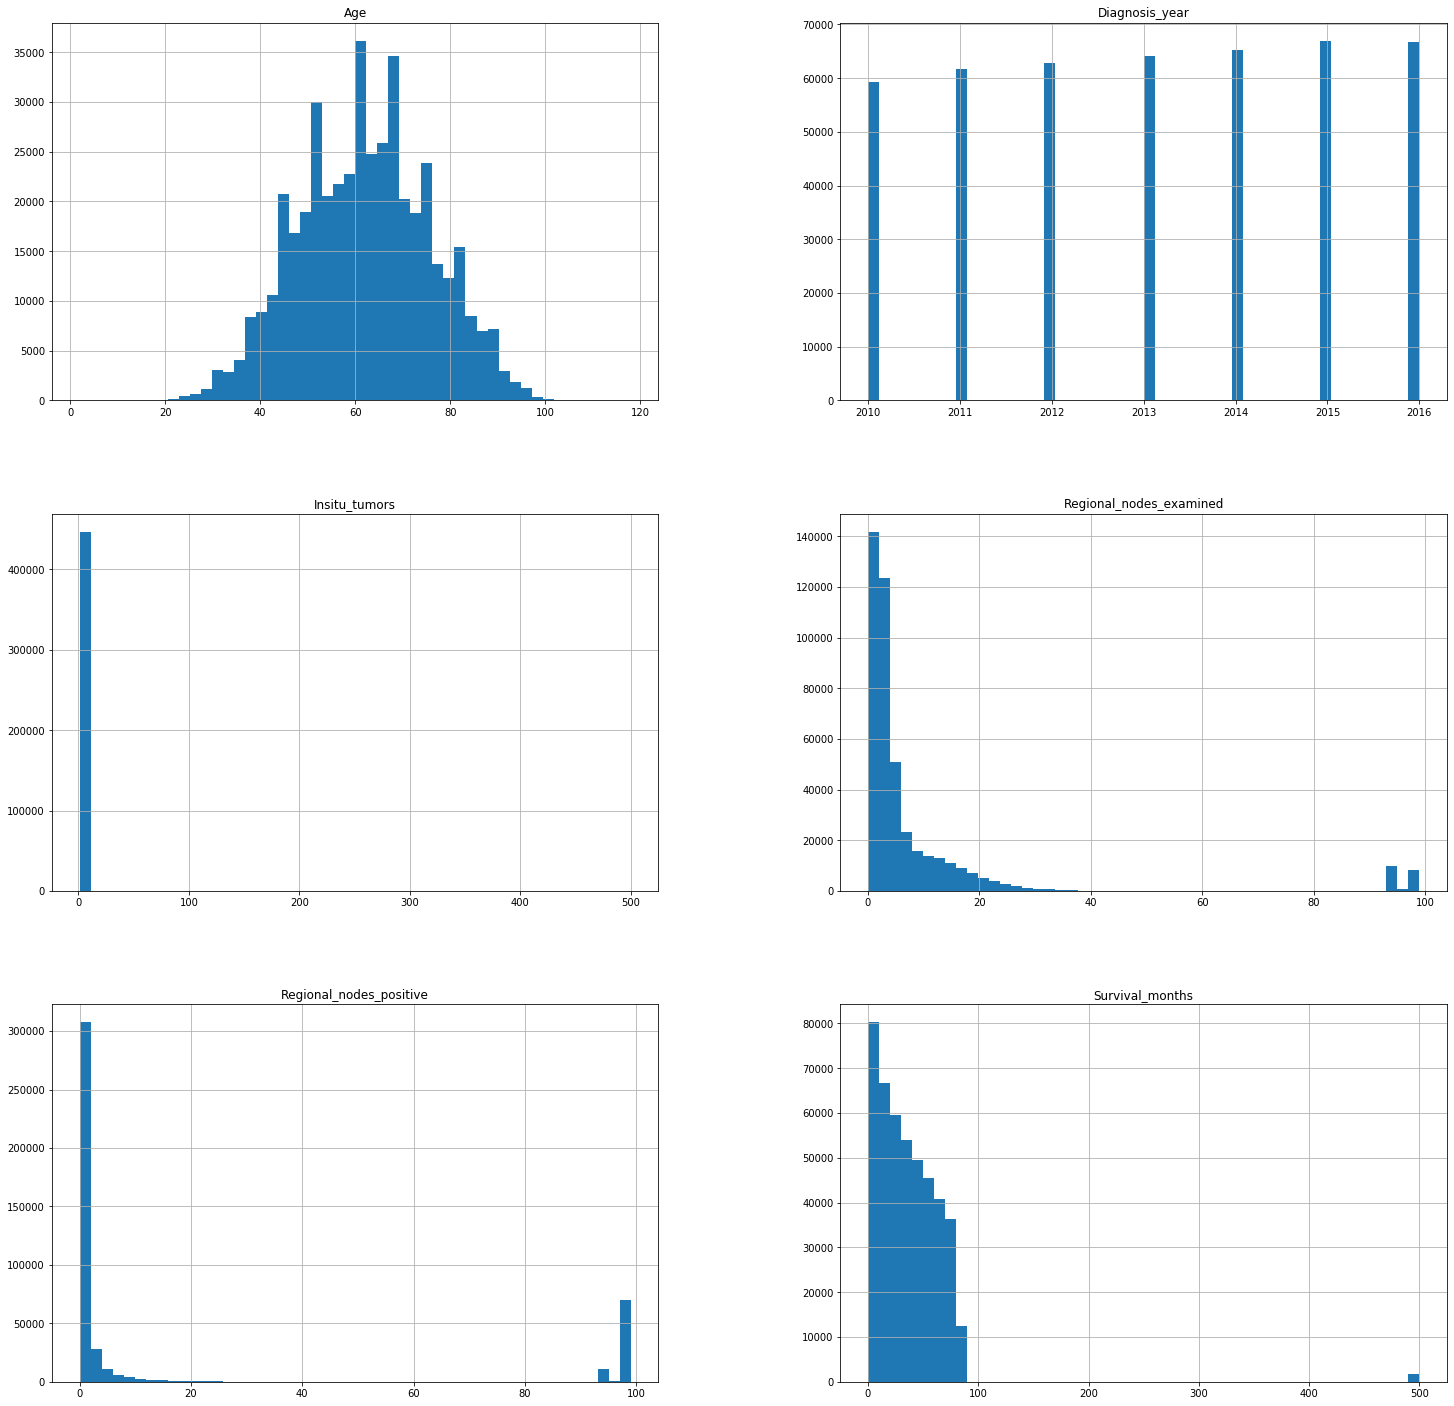

In [21]:
# ANALYSIS 1 - plot histograms of data features to check data distribution for each feature 

seer18_bc.hist(figsize=(25,25),bins=50)

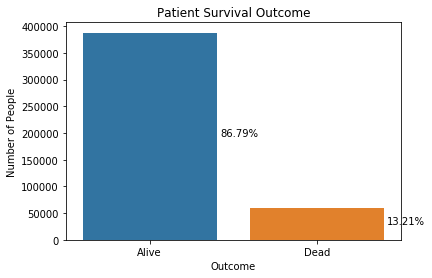

In [22]:
# ANALYSIS 2 - BC Analysis by number of BC survivors and number dead
# The survival rate of breast cancer patients is 86.79% 

ax = sns.countplot(x = 'Outcome', data = seer18_bc)
ax.set_xlabel("Outcome")
ax.set_ylabel("Number of People")
ax.set_title("Patient Survival Outcome")

total = len(seer18_bc['Outcome'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()


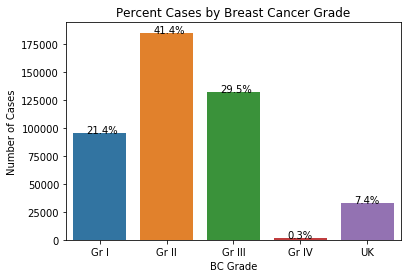

In [23]:
# ANALYSIS 3 - BC Analysis by Grade and Cases


ax = sns.countplot(x="Grade", data=seer18_bc, order = ['Gr I', 'Gr II', 'Gr III', 'Gr IV', 'UK'])
ax.set_xlabel("BC Grade")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent Cases by Breast Cancer Grade")
total = len(seer18_bc['Outcome'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.6
        y = p.get_y() + p.get_height()+ 0.85
        ax.annotate(percentage, (x, y))

plt.show()

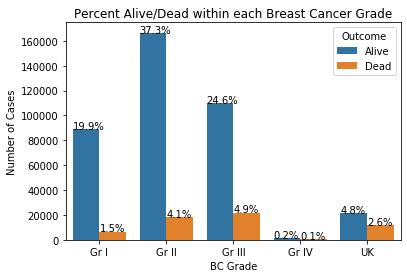

In [24]:
# ANALYSIS 4 - BC Analysis by Grade and Survival Outcome
# There is more percent of Bresat Cancer patients with Grade II BC and their survival rate is the highest.
# The lowest survival rate is seen in Grade IV breast cancer patients

ax = sns.countplot(x="Grade", hue = 'Outcome', data=seer18_bc, order = ['Gr I', 'Gr II', 'Gr III', 'Gr IV', 'UK'])
ax.set_xlabel("BC Grade")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent Alive/Dead within each Breast Cancer Grade")
total = len(seer18_bc['Outcome'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.4
        y = p.get_y() + p.get_height()+ 0.8
        ax.annotate(percentage, (x, y))

plt.show()


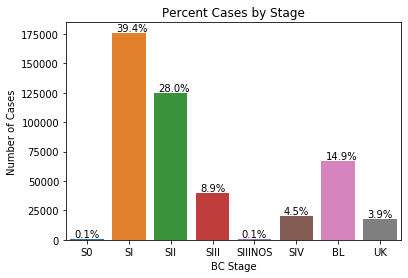

In [25]:
# ANALYSIS-5 BC Analysis by Stage and Percent Cases

ax = sns.countplot(x="Stage", data=seer18_bc, order = ['S0','SI', 'SII', 'SIII', 'SIIINOS','SIV', 'BL', 'UK'])
ax.set_xlabel("BC Stage")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent Cases by Stage")

total = len(seer18_bc['Outcome'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.7
        
        y = p.get_y() + p.get_height() + 1500
        ax.annotate(percentage, (x, y))

plt.show()

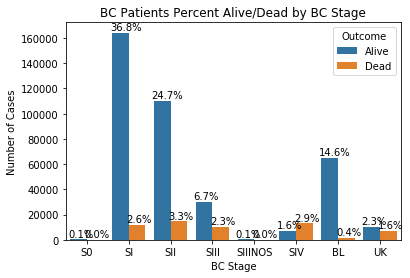

In [26]:
# ANALYSIS-6 BC Analysis by Stage and Survival Outcome

ax = sns.countplot(x="Stage", hue = 'Outcome', data=seer18_bc, order = ['S0','SI', 'SII', 'SIII', 'SIIINOS','SIV', 'BL', 'UK'])
ax.set_xlabel("BC Stage")
ax.set_ylabel("Number of Cases")
ax.set_title("BC Patients Percent Alive/Dead by BC Stage")

total = len(seer18_bc['Outcome'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.45
        
        y = p.get_y() + p.get_height() + 2000
        ax.annotate(percentage, (x, y))

plt.show()

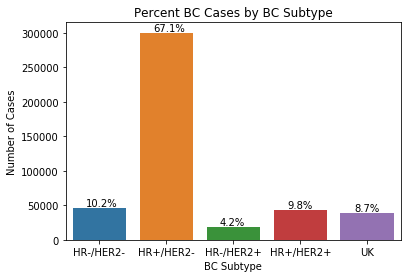

In [27]:
# ANALYSIS-7 BC Analysis by Percent Cases and BC Subtype

ax = sns.countplot(x="Subtype", data=seer18_bc, order = ['HR-/HER2-', 'HR+/HER2-', 'HR-/HER2+', 'HR+/HER2+', 'UK'])
ax.set_xlabel("BC Subtype")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent BC Cases by BC Subtype")


total = len(seer18_bc['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.6
    y = p.get_y() + p.get_height() + 2500
    ax.annotate(percentage, (x,y))

plt.show()
            

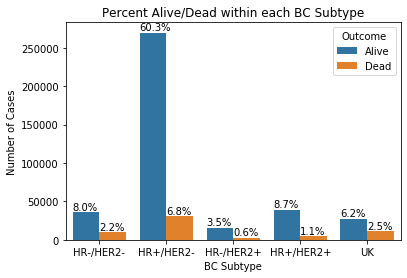

In [28]:
# ANALYSIS-8 BC Analysis by Survival Outcome and Subtype

ax = sns.countplot(x="Subtype", hue = 'Outcome', data=seer18_bc, order = ['HR-/HER2-', 'HR+/HER2-', 'HR-/HER2+', 'HR+/HER2+', 'UK'])
ax.set_xlabel("BC Subtype")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent Alive/Dead within each BC Subtype")


total = len(seer18_bc['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() + 3000
    ax.annotate(percentage, (x,y))

plt.show()



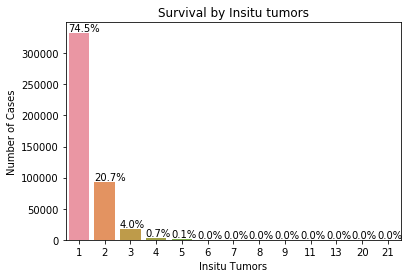

In [29]:
# ANALYSIS-9 BC Analysis by Percent Cases and Insitu Tumors

# Insitu tumors greater than 5 were very low or near 0%

seer18_bc_drop500 = seer18_bc[seer18_bc["Insitu_tumors"] != 500]
ax = sns.countplot(x="Insitu_tumors", data=seer18_bc_drop500)
ax.set_xlabel("Insitu Tumors")
ax.set_ylabel("Number of Cases")
ax.set_title("Survival by Insitu tumors")

total = len(seer18_bc_drop500['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.8
    y = p.get_y() + p.get_height() + 3000
    ax.annotate(percentage, (x,y))

plt.show()

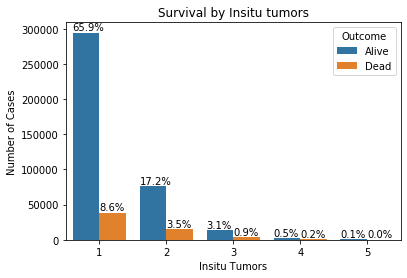

In [30]:
# ANALYSIS-10 BC Analysis by Survival Outcome and Insitu Tumors

# All Insitu tumors greater than 5 were not plotted since the percentage was almost 0

seer18_bc_drop500 = seer18_bc[seer18_bc["Insitu_tumors"] != 500]
ax = sns.countplot(x="Insitu_tumors", hue = 'Outcome', data=seer18_bc_drop500, order = [1, 2, 3, 4, 5])
ax.set_xlabel("Insitu Tumors")
ax.set_ylabel("Number of Cases")
ax.set_title("Survival by Insitu tumors")

total = len(seer18_bc_drop500['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_y() + p.get_height() + 3000
    ax.annotate(percentage, (x,y))

plt.show()
            

<Figure size 7200x2160 with 0 Axes>

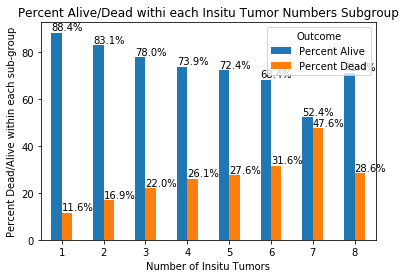

Outcome,Insitu_tumors,Alive,Dead,Percent Alive,Percent Dead
0,1,294428.0,38546.0,88.423721,11.576279
1,2,76730.0,15554.0,83.145507,16.854493
2,3,13765.0,3884.0,77.993087,22.006913
3,4,2315.0,818.0,73.890839,26.109161
4,5,437.0,167.0,72.350993,27.649007
5,6,80.0,37.0,68.376068,31.623932
6,7,11.0,10.0,52.380952,47.619048
7,8,10.0,4.0,71.428571,28.571429


In [31]:
# Analysis 11 - Percent Dead and Alive within each Insitu Tumors Numbers Subgroup

insitu_tum = seer18_bc.groupby(['Insitu_tumors', 'Outcome']).size().reset_index(name = 'Counts')
insitu_tum

# Pivot table with columns as Outcome will create two new columns of Aive and Dead and the values will be the Counts.
#This will allow us to calculate within group alive and dead percentages

insitu_tum_alive_dead = pd.pivot_table(insitu_tum, index = 'Insitu_tumors', values = 'Counts', columns = 'Outcome').reset_index()

# Dropping the index from 8 onwards so that only 1-8 insitu tumor data is captured, since the others have NAN values

insitu_tum_alive_dead = insitu_tum_alive_dead.drop(insitu_tum_alive_dead.index[8:])
insitu_tum_alive_dead

insitu_tum_alive_dead['Percent Alive'] = insitu_tum_alive_dead['Alive'] * 100 /(insitu_tum_alive_dead['Alive'] + insitu_tum_alive_dead['Dead']).astype(float)
insitu_tum_alive_dead['Percent Dead'] = insitu_tum_alive_dead['Dead'] * 100 /(insitu_tum_alive_dead['Alive'] + insitu_tum_alive_dead['Dead']).astype(float)


# Creating the bar plot to show the percent dead and alive within each insitu tumor numbers sub-group
plt.figure(figsize = (100, 30))

ax = insitu_tum_alive_dead.plot(kind = 'bar', x = 'Insitu_tumors', y = ['Percent Alive', 'Percent Dead'])
ax.set_xlabel("Number of Insitu Tumors")
ax.set_ylabel("Percent Dead/Alive within each sub-group")
ax.set_title("Percent Alive/Dead withi each Insitu Tumor Numbers Subgroup")
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )
for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

insitu_tum_alive_dead

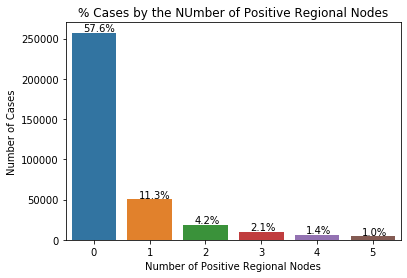

In [38]:
# ANALYSIS-12 BC Analysis by Percent Cases and Regional Nodes Positive


seer18_bc_lessthan5 = seer18_bc[seer18_bc["Regional_nodes_positive"] <= 5]

ax = sns.countplot(x="Regional_nodes_positive", data = seer18_bc_lessthan5)
ax.set_xlabel("Number of Positive Regional Nodes")
ax.set_ylabel("Number of Cases")
ax.set_title("% Cases by the NUmber of Positive Regional Nodes")

total = len(seer18_bc['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.6
    y = p.get_y() + p.get_height() + 2000
    ax.annotate(percentage, (x,y))

plt.show()

In [32]:
# ANALYSIS 11 - Check the State County descriptors

seer18_bc['State-county'].value_counts()

CA: Los Angeles Registry (06037)    44600
CA: San Diego County (06073)        15812
CA: Orange County (06059)           15412
WA: King County (53033)             11293
MI: Wayne County (26163)             9938
                                    ...  
GA: Webster County (13307)              8
UT: Piute County (49031)                7
CA: Alpine County (06003)               6
UT: Rich County (49033)                 5
UT: Daggett County (49009)              2
Name: State-county, Length: 614, dtype: int64

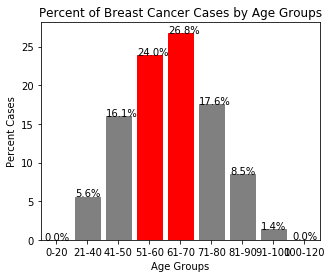

In [33]:
# ANALYSIS 12: Bar Plot - Count and Percentage of Breast Cancer cases by Age Groups

bc_age_groups = seer18_bc.groupby(['Age Groups']).size().reset_index(name = 'Counts')
bc_age_groups
bc_age_groups['Percent of Total Cases'] = bc_age_groups['Counts'].apply(lambda x: 100 * x/bc_age_groups['Counts'].sum()).astype(float)
bc_age_groups

# Heatmap of Breast Cancer cases by Age Groups
#Insight Majority of the cases are in age groups 51-70 (51%)

agegp_percent = pd.pivot_table(bc_age_groups, values=['Percent of Total Cases'], index=['Age Groups'])

agegp_percent

plt.figure(figsize = (5, 4))


bc_age_groups

ax = sns.barplot(data = bc_age_groups, x = 'Age Groups', y = 'Percent of Total Cases')
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percent Cases")
ax.set_title("Percent of Breast Cancer Cases by Age Groups")

total = len(bc_age_groups['Percent of Total Cases'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.8
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x,y))

for bar in ax.patches:
    if bar.get_height() > 23:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.show()
            
    


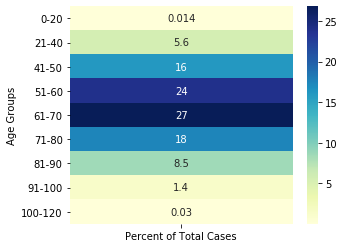

,Age Groups,Counts,Percent of Total Cases
0,0-20,62,0.013876
1,21-40,25018,5.599298
2,41-50,71744,16.057081
3,51-60,107037,23.956035
4,61-70,119766,26.804922
5,71-80,78543,17.578770
6,81-90,38128,8.533457
7,91-100,6373,1.426346
8,100-120,135,0.030214


In [34]:
# ANALYSIS 13: Heatmap - Count and Percentage of Breast Cancer cases by Age Groups

bc_age_groups = seer18_bc.groupby(['Age Groups']).size().reset_index(name = 'Counts')
bc_age_groups
bc_age_groups['Percent of Total Cases'] = bc_age_groups['Counts'].apply(lambda x: 100 * x/bc_age_groups['Counts'].sum()).astype(float)
bc_age_groups

# Heatmap of Breast Cancer cases by Age Groups
#Insight Majority of the cases are in age groups 51-70 (51%)

agegp_percent = pd.pivot_table(bc_age_groups, values=['Percent of Total Cases'], index=['Age Groups'])

agegp_percent

plt.figure(figsize = (5, 4))

sns.heatmap(agegp_percent, cmap="YlGnBu", annot=True)

total = len(bc_age_groups['Percent of Total Cases'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.8
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x,y))
    
plt.show()

bc_age_groups

In [35]:
# ANALYSIS 14 - Grouping data by Age Groups and then by Outcome - Table

agegp_outcome = seer18_bc.groupby(['Age Groups','Outcome']).size().reset_index(name = 'Counts')
agegp_outcome
agegp_outcome_pt = pd.pivot_table(agegp_outcome, values = 'Counts', index = ['Age Groups'], columns = 'Outcome').reset_index()
agegp_outcome_pt['Percent Alive (Within Age Group)'] = (agegp_outcome_pt['Alive']/(agegp_outcome_pt['Alive'] + agegp_outcome_pt['Dead'])*100).astype(float).round(2)
agegp_outcome_pt['Percent Dead (Within Age Group)'] = (agegp_outcome_pt['Dead']/(agegp_outcome_pt['Alive'] + agegp_outcome_pt['Dead'])*100).astype(float).round(2)

agegp_outcome_pt


Outcome,Age Groups,Alive,Dead,Percent Alive (Within Age Group),Percent Dead (Within Age Group)
0,0-20,55,7,88.71,11.29
1,21-40,22670,2348,90.61,9.39
2,41-50,66555,5189,92.77,7.23
3,51-60,97695,9342,91.27,8.73
4,61-70,107639,12127,89.87,10.13
5,71-80,65688,12855,83.63,16.37
6,81-90,24837,13291,65.14,34.86
7,91-100,2618,3755,41.08,58.92
8,100-120,27,108,20.00,80.00


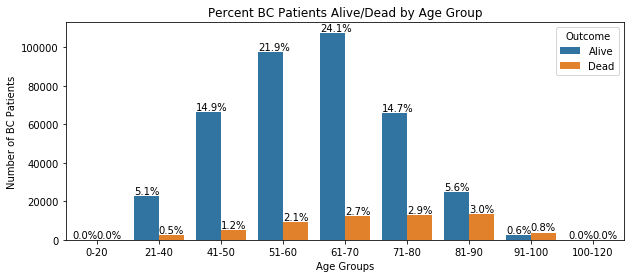

In [36]:
# Analysis 15: Outcome (Percent Alive/Dead) of BC patients by Age Group (as of the total population)

plt.figure(figsize = (10, 4))

ax = sns.countplot(data = seer18_bc, x = 'Age Groups', hue = 'Outcome')
ax.set_xlabel("Age Groups")
ax.set_ylabel("Number of BC Patients")
ax.set_title("Percent BC Patients Alive/Dead by Age Group")

total = len(seer18_bc['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100* p.get_height()/total)
    x = p.get_x() + p.get_width() -0.4
    y = p.get_y() + p.get_height() + 1000
    ax.annotate(percentage, (x,y))
    
plt.show()

Outcome,Age Groups,Alive,Dead,Percent Alive (Within Age Group),Percent Dead (Within Age Group)
0,0-20,55,7,88.71,11.29
1,21-40,22670,2348,90.61,9.39
2,41-50,66555,5189,92.77,7.23
3,51-60,97695,9342,91.27,8.73
4,61-70,107639,12127,89.87,10.13
5,71-80,65688,12855,83.63,16.37
6,81-90,24837,13291,65.14,34.86
7,91-100,2618,3755,41.08,58.92
8,100-120,27,108,20.00,80.00


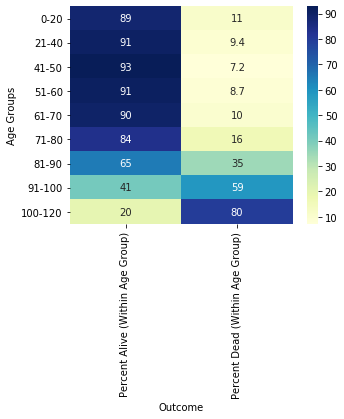

In [37]:
# ANALYSIS 16 - Heatmap of within Age Group Percent Alive and Dead

heatmapage_data = pd.pivot_table(agegp_outcome_pt, values=['Percent Dead (Within Age Group)', 'Percent Alive (Within Age Group)'],
                     index=['Age Groups'])

# Plotting the heatmap of the data

plt.figure(figsize = (5, 4))
sns.heatmap(heatmapage_data, cmap="YlGnBu", annot=True)

# Displaying the table which breaks down the breast cancer patients by age groups and the percent dead and alive

agegp_outcome_pt

Stage,S0,SI,SII,SIII,SIIINOS,SIV
Age Groups,,,,,,
0-20,0.000000,17.500000,60.000000,17.500000,0.000000,5.000000
21-40,0.122868,27.610950,46.906178,18.553104,0.176930,6.629970
41-50,0.097190,42.104999,39.531143,13.626690,0.108920,4.531059
51-60,0.113803,47.614116,34.929613,11.556714,0.096733,5.689021
61-70,0.146879,53.985764,31.319138,9.198944,0.083197,5.266077
71-80,0.158393,55.811449,30.007603,8.337821,0.115627,5.569107
81-90,0.259933,48.205786,33.673159,10.265672,0.216048,7.379401
91-100,0.476549,34.060697,41.334337,14.747931,0.576875,8.803612
100-120,0.000000,31.111111,44.444444,17.777778,0.000000,6.666667


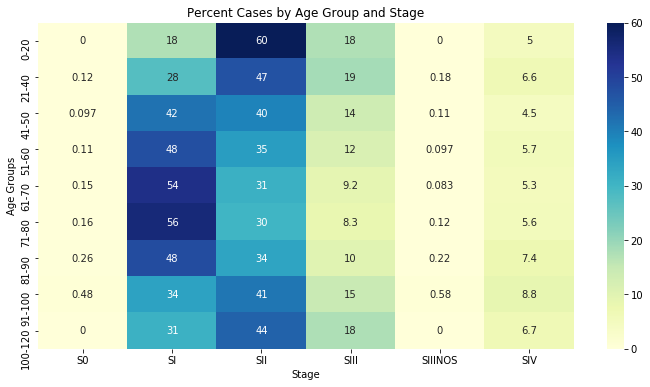

In [41]:
# Analysis 17 - Table and heatmap for Percent Cases within each Age Group by Stage 

age_stage = seer18_bc.groupby(["Age Groups", "Stage"]).size().reset_index(name = "Counts")

# Eliminate the UK and missing stages colums
age_stage_minus_bl_uk_missing = age_stage[(age_stage["Stage"]!= 'BL') & (age_stage["Stage"]!= 'UK') & (age_stage["Stage"]!= 'missing')]
age_stage_minus_bl_uk_missing

grouped_data = age_stage_minus_bl_uk_missing.groupby(["Age Groups", "Stage"]).agg({'Counts': 'sum'})
grouped_data

grouped_data["% by Stage per Age Group"] = grouped_data.groupby(level=0).apply(lambda x:  100*x / x.sum())
grouped_data1 = grouped_data.reset_index()
grouped_data1_pt = pd.pivot_table(grouped_data1, index = "Age Groups", values ="% by Stage per Age Group", columns = "Stage" )

# Heatmap for % Cases by Stage per Age-Group

plt.figure(figsize = (12, 6))
sns.heatmap(grouped_data1_pt, cmap = 'YlGnBu', annot = True)
plt.title('Percent Cases by Age Group and Stage')
grouped_data1_pt



In [39]:
#ANALYSIS 9 - Grouping the dataset by Age, Stage, Grade, Outcome

stage_grade_outcome = seer18_bc.groupby(["Stage", 'Grade', 'Outcome']).size().reset_index(name = 'Counts')
stage_grade_outcome


,Stage,Grade,Outcome,Counts
0,BL,Gr I,Alive,14529
1,BL,Gr I,Dead,110
2,BL,Gr II,Alive,28677
3,BL,Gr II,Dead,350
4,BL,Gr III,Alive,18389
...,...,...,...,...
85,missing,Gr III,Dead,84
86,missing,Gr IV,Alive,58
87,missing,Gr IV,Dead,53
88,missing,UK,Alive,87


Grade,Gr I,Gr II,Gr III,Gr IV
Stage,,,,
S0,14.285714,4.081633,10.096154,20.000000
SI,5.960113,6.545511,7.654889,12.668464
SII,8.793065,9.937700,14.066627,19.495413
SIII,15.107914,18.464159,30.908995,36.231884
SIIINOS,41.379310,35.051546,42.405063,66.666667
SIV,49.881797,56.852469,67.602406,82.786885


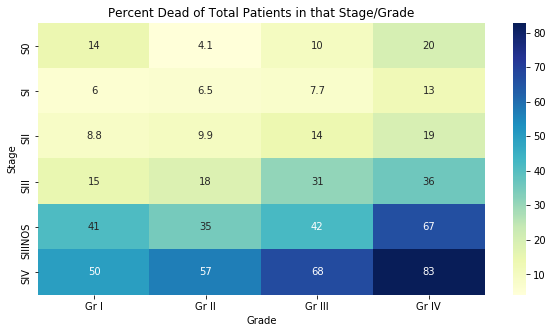

In [40]:
# Analysis 9 contd 
# Creating a pivot table and heatmap to see percent of BC dead with respect to stage and grade
# Number of BC related deaths increase as the Stage and Grade increases.

stagradsmoc_pt = pd.pivot_table(stage_grade_outcome, values = 'Counts', index = ['Stage','Grade'], columns = ['Outcome'])
stagradsmoc_pt["Percent Alive"] = (stagradsmoc_pt["Alive"]/(stagradsmoc_pt["Alive"] + stagradsmoc_pt["Dead"])*100)
stagradsmoc_pt["Percent Dead"] = (stagradsmoc_pt["Dead"]/(stagradsmoc_pt["Alive"] + stagradsmoc_pt["Dead"])*100)
stagradsmoc_pt.reset_index(inplace = True)
stagradsmoc_pt

# Heatmap of the percent patients who died by Stage and Grade(percent siginifies values for only that Stage/Grade) 

heatmap1_data = pd.pivot_table(stagradsmoc_pt, values='Percent Dead', 
                     index=['Stage'], 
                     columns='Grade')

hmapminus1 = heatmap1_data.drop(heatmap1_data.index[7:9])
hmapminus2 = hmapminus1.drop(hmapminus1.index[0])
hmapminusuk = hmapminus2.drop(columns = ['UK'])
hmapminusuk


plt.figure(figsize = (10, 5))
sns.heatmap(hmapminusuk, cmap="YlGnBu", annot=True)
plt.title('Percent Dead of Total Patients in that Stage/Grade')
hmapminusuk


Outcome,Age Groups,Stage,Alive,Dead,Percent Alive,Percent Dead
1,0-20,SI,7,0,100.00,0.00
2,0-20,SII,22,2,91.67,8.33
3,0-20,SIII,5,2,71.43,28.57
5,0-20,SIV,1,1,50.00,50.00
6,21-40,S0,25,0,100.00,0.00
7,21-40,SI,5472,146,97.40,2.60
8,21-40,SII,8938,606,93.65,6.35
9,21-40,SIII,3044,731,80.64,19.36
10,21-40,SIIINOS,29,7,80.56,19.44
11,21-40,SIV,694,655,51.45,48.55


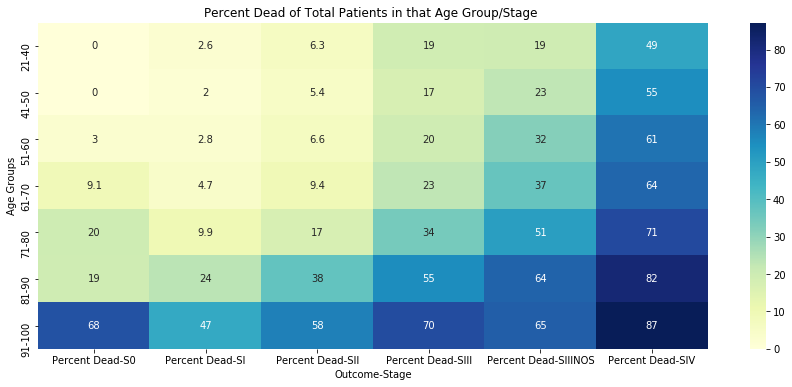

In [41]:
# Analysis 10 - Heatmap of percent survival of cases by Age groups and BC stage

agessm = seer18_bc.groupby(['Age Groups', "Stage", 'Outcome']).size().reset_index(name = 'Counts')

# Drop rows which have BL, UK and missing as values for Stage column

survivalminusBLUKmissing = agessm[(agessm['Stage'] != "BL") & (agessm['Stage'] != "UK") & (agessm['Stage'] != "missing")]
agessm_pt = pd.pivot_table(survivalminusBLUKmissing, values = 'Counts', index= ['Age Groups', 'Stage'], columns = 'Outcome').reset_index()
agessm_pt['Percent Alive'] = (agessm_pt['Alive']/(agessm_pt['Alive']+agessm_pt['Dead'])*100)
agessm_pt['Percent Dead'] = (agessm_pt['Dead']/(agessm_pt['Alive']+agessm_pt['Dead'])*100)
agessm_ptna = agessm_pt.dropna().copy()
agessm_ptna['Percent Alive'] = agessm_ptna['Percent Alive'].astype(float).round(2)
agessm_ptna['Percent Dead'] = agessm_ptna['Percent Dead'].astype(float).round(2)
agessm_ptna

# Heatmap for the Percent dead by age groups and stage 

heatmap_ageoutcome = pd.pivot_table(agessm_ptna, values=['Percent Dead'], index=['Age Groups'], columns = ['Stage'])
heatmap_ageoutcomena = heatmap_ageoutcome.dropna()

plt.figure(figsize = (15, 6))
sns.heatmap(heatmap_ageoutcomena, cmap="YlGnBu", annot=True)
plt.title('Percent Dead of Total Patients in that Age Group/Stage ')

agessm_ptna

Outcome,Regional_nodes_positive,Alive,Dead,Percent Alive,Percent Dead
0,0,242951,14274,94.5,5.5
1,1,45242,5053,90.0,10.0
2,2,16569,1990,89.3,10.7
3,3,8168,1275,86.5,13.5
4,4,5262,1008,83.9,16.1
5,5,3546,784,81.9,18.1


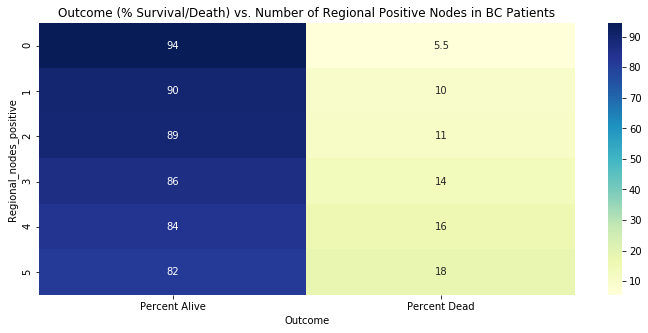

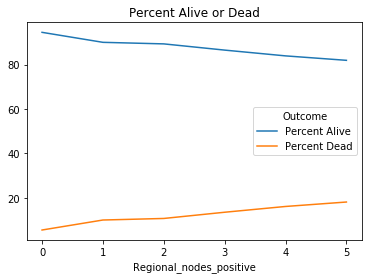

In [42]:
# Analysis 12 - Calculate the outcome with nodes positive

#Insight - As number of positive nodes increases the percent of deaths also increases

nodesoc = pd.crosstab(seer18_bc["Regional_nodes_positive"], seer18_bc["Outcome"])
nodesoc_df = nodesoc.drop([95, 97, 98, 99]).reset_index()
nodes_1_5 = nodesoc_df.drop(nodesoc_df.index[6:64])

#nodesoc_df.sort_values(ascending = False, by = 'Alive', inplace = True)
#nodesoc_df
nodes_1_5["Percent Alive"] = (nodes_1_5["Alive"]/(nodes_1_5["Alive"] + nodes_1_5["Dead"])*100).astype(float).round(1)
nodes_1_5["Percent Dead"] = (nodes_1_5["Dead"]/(nodes_1_5["Alive"] + nodes_1_5["Dead"])*100).astype(float).round(1)

heatmap_df5 = pd.pivot_table(nodes_1_5, index = 'Regional_nodes_positive', values = ['Percent Alive', 'Percent Dead'])
plt.figure(figsize = (12, 5))
sns.heatmap(heatmap_df5,cmap="YlGnBu", annot = True )
plt.title('Outcome (% Survival/Death) vs. Number of Regional Positive Nodes in BC Patients')

# Plot of Percent alive and dead vs. number of positive regional nodes 

nodes_1_5.plot(x = 'Regional_nodes_positive', y = ["Percent Alive", "Percent Dead"], title = 'Percent Alive or Dead')
nodes_1_5


nodes_1_5

Outcome,Insitu_tumors,Alive,Dead,Percent Alive,Percent Dead
0,1,294428,38546,88.4,11.6
1,2,76730,15554,83.1,16.9
2,3,13765,3884,78.0,22.0
3,4,2315,818,73.9,26.1
4,5,437,167,72.4,27.6
5,6,80,37,68.4,31.6
6,7,11,10,52.4,47.6
7,8,10,4,71.4,28.6


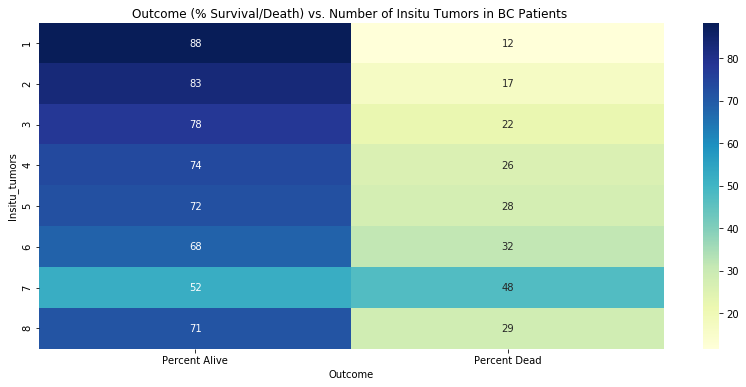

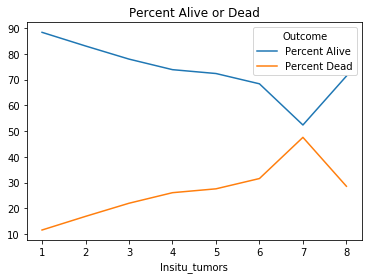

In [43]:
# Analysi 13 - Calculate the outcome with insitu tumors

instumorsoc = pd.crosstab(seer18_bc["Insitu_tumors"], seer18_bc["Outcome"])

#instumorsoc_df = nodesoc.drop([95, 97, 98, 99]).reset_index()

instumorsoc_df = instumorsoc.drop(instumorsoc.index[8:]).reset_index()
instumorsoc_df

#nodesoc_df.sort_values(ascending = False, by = 'Alive', inplace = True)
#nodesoc_df

instumorsoc_df["Percent Alive"] = (instumorsoc_df["Alive"]/(instumorsoc_df["Alive"] + instumorsoc_df["Dead"])*100).astype(float).round(1)
instumorsoc_df["Percent Dead"] = (instumorsoc_df["Dead"]/(instumorsoc_df["Alive"] + instumorsoc_df["Dead"])*100).astype(float).round(1)
instumorsoc_df

# Heatmap of number of insitu tumors vs. Percent Alive and Percent Dead
heatmap_instumors = pd.pivot_table(instumorsoc_df, values = ["Percent Alive", "Percent Dead"], index = "Insitu_tumors")
plt.figure(figsize = (14, 6))
sns.heatmap(heatmap_instumors, cmap = "YlGnBu", annot = True)
plt.title('Outcome (% Survival/Death) vs. Number of Insitu Tumors in BC Patients ')


# Plot of percent alive and dead vs. number of insitu tumors

instumorsoc_df.plot(x = "Insitu_tumors", y = ["Percent Alive", "Percent Dead"], title = 'Percent Alive or Dead')
instumorsoc_df

,Counts,Percent Cases
State,,
AK,486,0.11
CA,180330,40.36
CT,22621,5.06
GA,49260,11.02
HI,8125,1.82
IA,16664,3.73
KY,23658,5.29
LA,23601,5.28
MI,22609,5.06


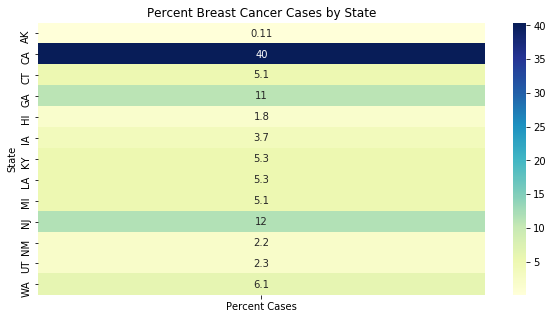

In [44]:
# Analysis 14 - BC by State

state_level = seer18_bc_region.groupby(['State']).size().reset_index(name = 'Counts')
state_level
state_level_grouped = state_level.groupby(['State']).agg({"Counts": 'sum'})
state_level_grouped["Percent Cases"] = state_level_grouped.apply(lambda x: 100*x/x.sum()).round(2)
state_level_grouped

# Percent BC cases by state 

st_level_pt = pd.pivot_table(state_level_grouped, values = 'Percent Cases', index = 'State')
plt.figure(figsize = (10, 5))
sns.heatmap(st_level_pt, annot = True, cmap = 'YlGnBu')
plt.title('Percent Breast Cancer Cases by State')

state_level_grouped

,State,County,Zipcode,Counts,Percent of total CA Cases
18,CA,Los Angeles Registry,06037,44600,24.73
36,CA,San Diego County,06073,15812,8.77
29,CA,Orange County,06059,15412,8.55
32,CA,Riverside County,06065,9801,5.44
42,CA,Santa Clara County,06085,8566,4.75
35,CA,San Bernardino County,06071,8010,4.44
0,CA,Alameda County,06001,7587,4.21
33,CA,Sacramento County,06067,7572,4.20
6,CA,Contra Costa County,06013,6111,3.39
40,CA,San Mateo County,06081,4420,2.45


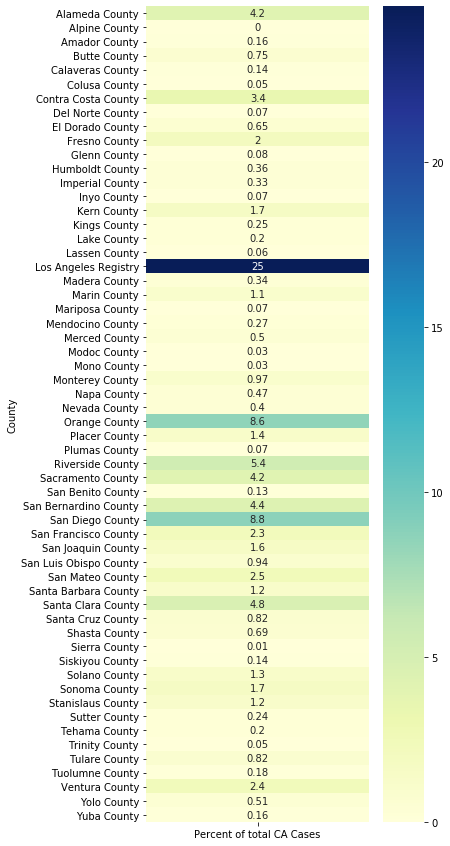

In [43]:
# Analysis 15 - CA BC Cases - Calculating the percent cases in CA at the county level

stcountyzcode = seer18_bc_region.groupby(['State', 'County', 'Zipcode']).size().reset_index(name = "Counts")
st_df = stcountyzcode[(stcountyzcode['State'] == 'CA')]

stcountyzcode_ca = st_df.groupby(['State', 'County', 'Zipcode']).agg({'Counts':'sum'})
stcountyzcode_ca ['Percent of total CA Cases'] = stcountyzcode_ca.groupby(level=0).apply(lambda x: 100*x / x.sum()).astype(float).round(2)
stcountyzcode_ca_copy = stcountyzcode_ca.copy() 

df_reset = stcountyzcode_ca_copy.reset_index()
df_reset.sort_values(ascending = False, by = 'Percent of total CA Cases', inplace = True)
df_reset

# Saving the data to a csv file
df_reset.to_csv('ca_counties.csv', index = False)

# Heatmap of BC cases by percent in CA counties (of total BC CA cases)

stheatmap_pt = pd.pivot_table(stcountyzcode_ca, values = "Percent of total CA Cases", index = 'County')
plt.figure(figsize = (5, 15))
sns.heatmap(stheatmap_pt, cmap = 'YlGnBu', annot = True)


df_reset

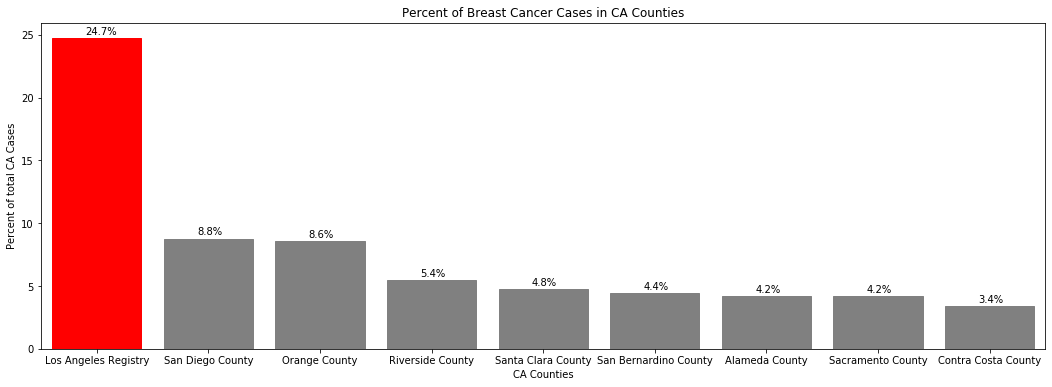

In [62]:
# Cases by CA Counties (< 3% excluded)

df_reset_percent_greater_than_3 = df_reset[(df_reset["Percent of total CA Cases"] > 3.3)]
plt.figure(figsize = (18, 6))
ax = sns.barplot(data = df_reset_percent_greater_than_3, x = 'County', y = 'Percent of total CA Cases' )
ax.set_xlabel("CA Counties")
ax.set_ylabel("Percent of total CA Cases")
ax.set_title("Percent of Breast Cancer Cases in CA Counties")

total = len(df_reset_percent_greater_than_3['Percent of total CA Cases'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height() + 0.3
    ax.annotate(percentage, (x,y))

for bar in ax.patches:
    if bar.get_height() > 23:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.show()
            


In [63]:
# Analysis 16 - Collected population, median income and % below poverty level data for all CA counties from census.gov.
# Merged this with the BC CA ounties dataset to create a new file.

caseer18_bc = pd.read_csv(r"/Users/shilpakamath-jha/Desktop/ca_counties_inc_pop_poverty.csv", sep = ',')
caseer18_bc.dtypes

State                               object
County                              object
Zipcode                              int64
Counts                               int64
Percent of total CA Cases          float64
Population                           int64
Individuals Below Poverty Level     object
% Below Poverty Level              float64
Median Income                        int64
dtype: object

In [64]:
# Data info

caseer18_bc.info()

caseer18_bc.rename(columns = {'Individuals Below Poverty Level': '% Individuals Below Poverty Level'}, inplace = True)
caseer18_bc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            58 non-null     object 
 1   County                           58 non-null     object 
 2   Zipcode                          58 non-null     int64  
 3   Counts                           58 non-null     int64  
 4   Percent of total CA Cases        58 non-null     float64
 5   Population                       58 non-null     int64  
 6   Individuals Below Poverty Level  58 non-null     object 
 7   % Below Poverty Level            58 non-null     float64
 8   Median Income                    58 non-null     int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.2+ KB


,State,County,Zipcode,Counts,Percent of total CA Cases,Population,% Individuals Below Poverty Level,% Below Poverty Level,Median Income
0,CA,Alameda County,6001,7587,4.21,1671329,9.00%,9.0,92574
1,CA,Alpine County,6003,6,0.00,1129,17.30%,17.3,64688
2,CA,Amador County,6005,281,0.16,39752,11.80%,11.8,61198
3,CA,Butte County,6007,1352,0.75,219186,18.50%,18.5,48443
4,CA,Calaveras County,6009,261,0.14,45905,12.10%,12.1,58151
5,CA,Colusa County,6011,87,0.05,21547,11.00%,11.0,56704
6,CA,Contra Costa County,6013,6111,3.39,1153526,7.80%,7.8,93712
7,CA,Del Norte County,6015,120,0.07,27812,20.40%,20.4,45258
8,CA,El Dorado County,6017,1177,0.65,192843,8.10%,8.1,80582
9,CA,Fresno County,6019,3674,2.04,999101,21.30%,21.3,51261


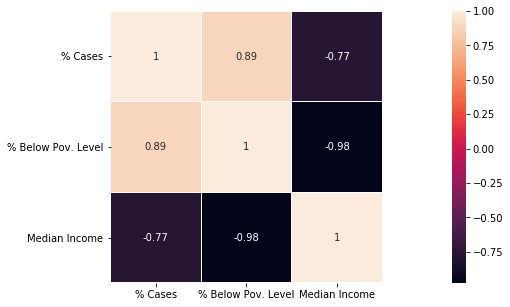

,State,County,% Cases,% Individuals Below Poverty Level,% Below Pov. Level,Median Income
18,CA,Los Angeles Registry,24.73,14.20%,14.2,64251
36,CA,San Diego County,8.77,11.50%,11.5,74855
29,CA,Orange County,8.55,10.50%,10.5,85398
42,CA,Santa Clara County,4.75,7.30%,7.3,116178


In [69]:
# Analysis 17 -  BC Cases by County in CA

caseer18_bc_drop = caseer18_bc.drop(columns = ['Zipcode', 'Counts', 'Population'])
caseer18_bc_drop.rename(columns = {
    'Percent of total CA Cases': '% Cases',
    '% Below Poverty Level': '% Below Pov. Level',
'Individuals Below Poverty Level': '% Individuals Below Poverty Level'}, inplace = True)

caseer18_bc_drop
caseer18_bc_minus_counts = caseer18_bc_drop.copy()
caseer18_bc_only_4counties = caseer18_bc_minus_counts[(caseer18_bc_minus_counts["County"] == "Los Angeles Registry") |
                                                      (caseer18_bc_minus_counts["County"] == "San Diego County") |
                                              (caseer18_bc_minus_counts["County"] == "Orange County") |
                                             (caseer18_bc_minus_counts["County"] == "Santa Clara County")]


# Correlation evaluation between income, poverty level and number of cases for LA, SC, and Orange county
 
plt.figure(figsize = (25, 5))
sns.heatmap(caseer18_bc_only_4counties.corr(), square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':10 })
plt.show()
caseer18_bc_only_4counties.sort_values(ascending = False, by = '% Below Pov. Level', inplace = True)
caseer18_bc_only_4counties

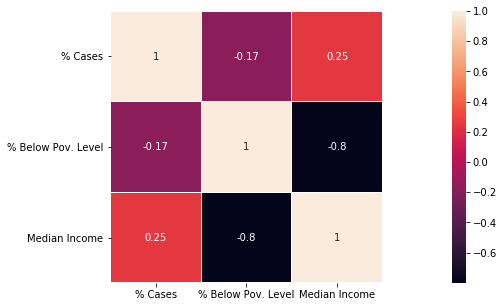

In [70]:
# Analysis 18 - Correlation evaluation between income, poverty level and number of cases for all of CA counties
# No significant correlation seen between any parameters (related to breast cancer)
 
plt.figure(figsize = (25, 5))
sns.heatmap(caseer18_bc_minus_counts.corr(), square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':10 })
plt.show()

In [71]:
# Second Stage - Logistic Regression of the main variable - Outcome 

# Confirm Dataset used

seer18_bc_region.head()


,Age recode with <1 year olds,Age,Race/ethnicity,Diagnosis_year,Race,state_county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive,State,County,Zipcode
0,50-54 years,54,White,2015,White,CA: Alameda County (06001),SII,HR+/HER2-,Positive,Positive,Negative,12,Alive,2,Gr II,7,1,CA,Alameda County,06001
1,40-44 years,44,White,2013,White,CA: Contra Costa County (06013),UK,UK,Unknown,Unknown,Unknown,28,Dead,3,UK,99,99,CA,Contra Costa County,06013
2,80-84 years,82,White,2012,White,CA: San Mateo County (06081),SI,HR+/HER2-,Positive,Positive,Negative,51,Alive,3,Gr II,0,98,CA,San Mateo County,06081
3,55-59 years,56,White,2014,White,CA: Marin County (06041),SI,HR+/HER2-,Positive,Positive,Negative,33,Alive,2,Gr II,1,0,CA,Marin County,06041
4,85+ years,85,Black,2011,Black,CA: Alameda County (06001),UK,UK,Unknown,Unknown,Unknown,10,Dead,2,UK,0,98,CA,Alameda County,06001


In [72]:
# Logistic Regression continued: Change the dependent variable to a binary value

seer18_bc_region["Outcome"].value_counts()

# Changing the dependent variable to  binary (1 for Alive and 0 for Dead)
outcome_replace = {
    'Alive': 1,
    'Dead': 0
}
seer18_bc_region.replace(outcome_replace, inplace = True)
seer18_bc_region['Outcome'].value_counts()



1    387784
0     59022
Name: Outcome, dtype: int64

In [73]:
# Check for null values anywhere in our dataset

seer18_bc_region.isnull().sum()

Age recode with <1 year olds    0
Age                             0
Race/ethnicity                  0
Diagnosis_year                  0
Race                            0
state_county                    0
Stage                           0
Subtype                         0
ER_status                       0
PR_status                       0
HER2                            0
Survival_months                 0
Outcome                         0
Insitu_tumors                   0
Grade                           0
Regional_nodes_examined         0
Regional_nodes_positive         0
State                           0
County                          0
Zipcode                         0
dtype: int64

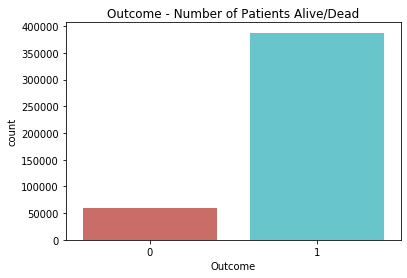

In [74]:
# Explore and visualize target variable

ax = plt.axes()
sns.countplot(x = 'Outcome', data = seer18_bc_region, palette = 'hls', ax = ax)

ax.set_title('Outcome - Number of Patients Alive/Dead')
plt.show()


In [113]:
# Drop the values which do not reflect the actual value (but are used because they reflect codes)
# Regional lymph nodes positive values >90 are not indictaive of positive number of nodes
# Insitu Tumor values of 500 reflect Unknown values which were filled with a number 500
lr_dataset = seer18_bc_region[(seer18_bc_region['Regional_nodes_examined'] <= 90)]
lr_dataset_1 = seer18_bc_region[(seer18_bc_region['Regional_nodes_positive'] <= 90)]
lr_dataset_ist = lr_dataset_1[(lr_dataset_1['Insitu_tumors']!= 500)]
lr_dataset_ist = lr_dataset_1[(lr_dataset_1['Survival_months']!= 500)]
lr_dataset_ist['Regional_nodes_positive'].value_counts()
lr_dataset_ist['Survival_months'].value_counts()

# Drop rows which have grade as UK
cat_dropgr = lr_dataset_ist[(lr_dataset_ist['Grade'] != "UK")]
cat_dropgr['Grade'].value_counts()

# Drop rows which have stage as BL, UK and missing

cat_dropgr_st = cat_dropgr[(cat_dropgr['Stage'] != 'BL') &
                          (cat_dropgr['Stage'] != 'UK') &
                          (cat_dropgr['Stage'] != 'missing')]
cat_dropgr_st['Stage'].value_counts()
print(lr_dataset.shape)
print(lr_dataset_ist.shape)
print(cat_dropgr_st.shape)

(427691, 20)
(365396, 20)
(295544, 20)


In [114]:
# Change the Stage values to multinomial

replace_st = {
    'S0': 1,
    'SI': 2,
    'SII': 3,
    'SIII': 4,
    'SIIINOS': 5,
    'SIV': 6
}
cat_dropgr_st['Stage'].replace(replace_st, inplace = True)
cat_dropgr_st['Stage'].value_counts()

2    150975
3    107549
4     32420
6      4289
1       176
5       135
Name: Stage, dtype: int64

In [115]:
# Change the Grade values to multinomial

replace_gr = {
    'Gr I': 1,
    'Gr II': 2,
    'Gr III': 3,
    'Gr IV': 4
}
cat_dropgr_st['Grade'].replace(replace_gr, inplace = True)
#cat_dropgr_st['Grade'] = cat_dropgr_st['Grade'].astype(int)
cat_dropgr_st['Grade'].value_counts()



2    131913
3     93054
1     69687
4       890
Name: Grade, dtype: int64

In [116]:
# Drop UK Subtype rows and Change the Grade values and replace to multinomial

cat_dropgr_st_hst = cat_dropgr_st[(cat_dropgr_st['Subtype'] != 'UK')]
cat_dropgr_st["Subtype"].value_counts()
replace_subtype = {
    'HR-/HER2-': 1,
    'HR+/HER2-': 2,
    'HR-/HER2+': 3,
    'HR+/HER2+': 4
}
cat_dropgr_st_hst["Subtype"].replace(replace_subtype, inplace = True)
#cat_dropgr_st["Subtype"] = cat_dropgr_st["Subtype"].astype(int)
cat_dropgr_st_hst.info()

# The categorical variables (Age recode with <1 year olds, Race/ethnicity, Diagnosis_year, Race, state_county,
# ER_status, PR_status, HER2, State, County, Zipcode) were dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280954 entries, 0 to 446804
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Age recode with <1 year olds  280954 non-null  object
 1   Age                           280954 non-null  int64 
 2   Race/ethnicity                280954 non-null  object
 3   Diagnosis_year                280954 non-null  int64 
 4   Race                          280954 non-null  object
 5   state_county                  280954 non-null  object
 6   Stage                         280954 non-null  int64 
 7   Subtype                       280954 non-null  int64 
 8   ER_status                     280954 non-null  object
 9   PR_status                     280954 non-null  object
 10  HER2                          280954 non-null  object
 11  Survival_months               280954 non-null  int64 
 12  Outcome                       280954 non-null  int64 
 13 

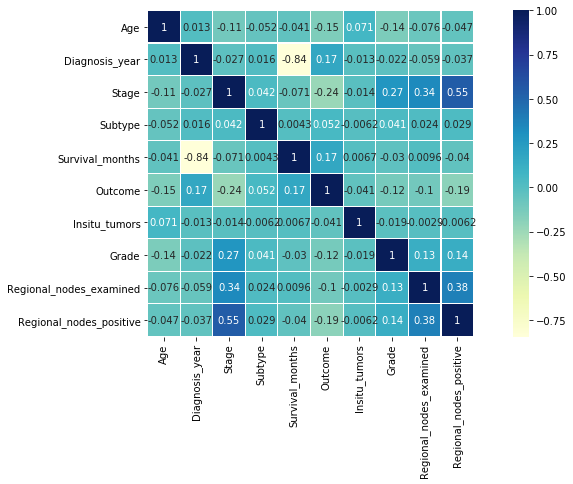

In [117]:
# Check for correlation between features. 
# The only decent size correlation seen is between Stage and Regional Nodes Positive

cat_dropgr_st_hst.corr()
plt.figure(figsize = (14, 6))
sns.heatmap(cat_dropgr_st_hst.corr(), square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':10 }, cmap = 'YlGnBu')
plt.show()

In [118]:
# Divide the given data into two types of variables 
# Dependent(or target variable - Outcome) and independent variables(or feature variables).
# Split 80% of the data into training set while 20% of the data to test set using below code
# SInce data is imbalanced , we use the startify parameter to ensure that the imbalanced sub-value is distributed equally

X = cat_dropgr_st_hst [['Age', 'Insitu_tumors', 'Regional_nodes_positive', 'Stage', 'Grade', 'Subtype', 'Regional_nodes_examined']]
y = cat_dropgr_st_hst ['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.20,random_state = 42, stratify = y)

In [119]:
# Feature scaling to scale the data features

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(224763, 7)
(56191, 7)
(224763,)
(56191,)


In [120]:
#Logistic Regression model using default
# Using fit() function for training model


from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression (random_state = 42)
LRClassifier.fit (X_train, y_train)


# Making prediction using training model
y_pred = LRClassifier.predict(X_test)



Text(0.5, 15.0, 'Predicted label')

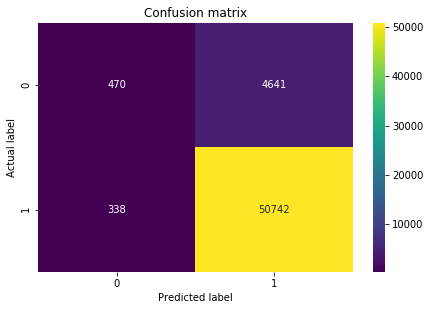

In [121]:
# Evaluate model using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9113915039775053
Precision: 0.916201722550241
Recall: 0.9933829287392326


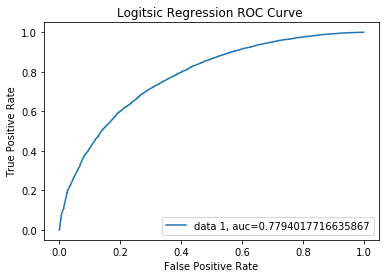

In [127]:
# ROC Curve

y_pred_proba = LRClassifier.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Logitsic Regression ROC Curve ')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)


Confusion Matrix: [[ 1133  3978]
 [ 2811 48269]]
Accuracy Score: 0.8791799398480183
Accuracy: 0.8791799398480183
Precision: 0.923861657128639
Recall: 0.9449686765857478


Text(0.5, 15.0, 'Predicted label')

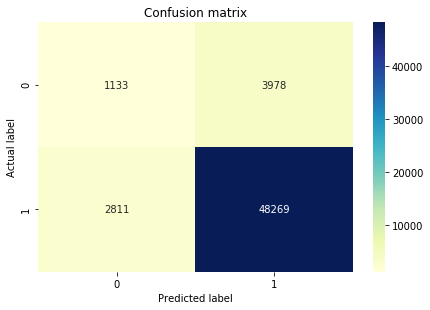

In [129]:
# Decision Tree Confusion Matrix


dt_conf_matrix = metrics.confusion_matrix(y_test, dt_predict)
dt_acc_score = metrics.accuracy_score(y_test, dt_predict)
print('Confusion Matrix: ' + str(dt_conf_matrix))
print('Accuracy Score: ' + str(dt_acc_score))

print("Accuracy:",metrics.accuracy_score(y_test, dt_predict))
print("Precision:",metrics.precision_score(y_test, dt_predict))
print("Recall:",metrics.recall_score(y_test, dt_predict))

sns.heatmap(dt_conf_matrix,  annot=True, cmap = 'YlGnBu' ,fmt='g' )

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


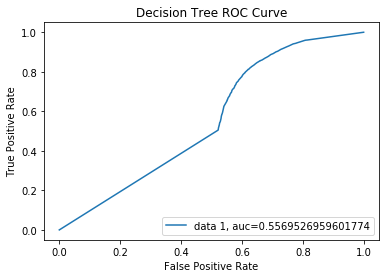

In [130]:
#DT - ROC Curve

y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.title('Decision Tree ROC Curve', y = 1.0)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

Accuracy: 0.9004644871954584
Precision: 0.9218555821415985
Recall: 0.9729835552075177


Text(0.5, 15.0, 'Predicted label')

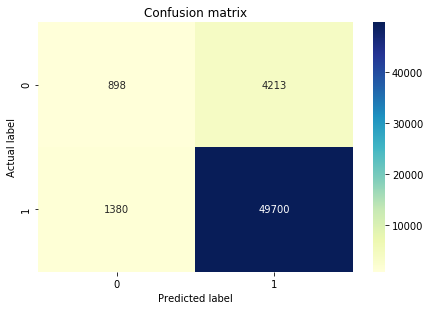

In [132]:
# Random Forest Confusion Matrix

rf_conf_matrix = metrics.confusion_matrix(y_test, rf_predict)
rf_acc_score = metrics.accuracy_score(y_test, rf_predict)
print("Accuracy:",metrics.accuracy_score(y_test, rf_predict))
print("Precision:",metrics.precision_score(y_test, rf_predict))
print("Recall:",metrics.recall_score(y_test, rf_predict))
sns.heatmap(rf_conf_matrix,  annot=True, cmap = 'YlGnBu' ,fmt='g' )

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

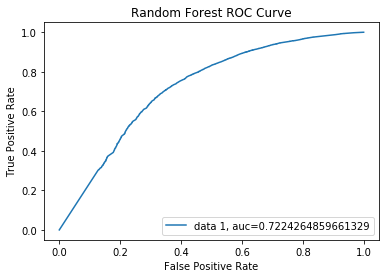

In [133]:
# Random Forest - ROC Curve

y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Random Forest ROC Curve', y = 1.0)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()